# NGUYỄN NHƯ QUỲNH - 11194482

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exercise 1:

In [2]:
import copy
def func(x):
    return x**2
def get_gradient(x, func, delta=1e-10):
    return (func(x + delta) - func(x))/delta
def gradient_descent(func, alpha = 0.1, max_iter = 200, delta=1e-8, rd_x = np.random.randn()):
    x_hist = [rd_x]
    count = 0
    while count < 200:
        new_x = rd_x - alpha*get_gradient(rd_x, func)
        x_hist.append(new_x)
        if abs(new_x - rd_x) < delta:
            break
        else:
            rd_x = copy.copy(new_x)
            count += 1
    return np.round(new_x, decimals = 5), x_hist
def plot_func(func, fig):
    x = np.linspace(-2,2, 100)
    y = func(x)
    fig.plot(x,y, alpha = 0.5)

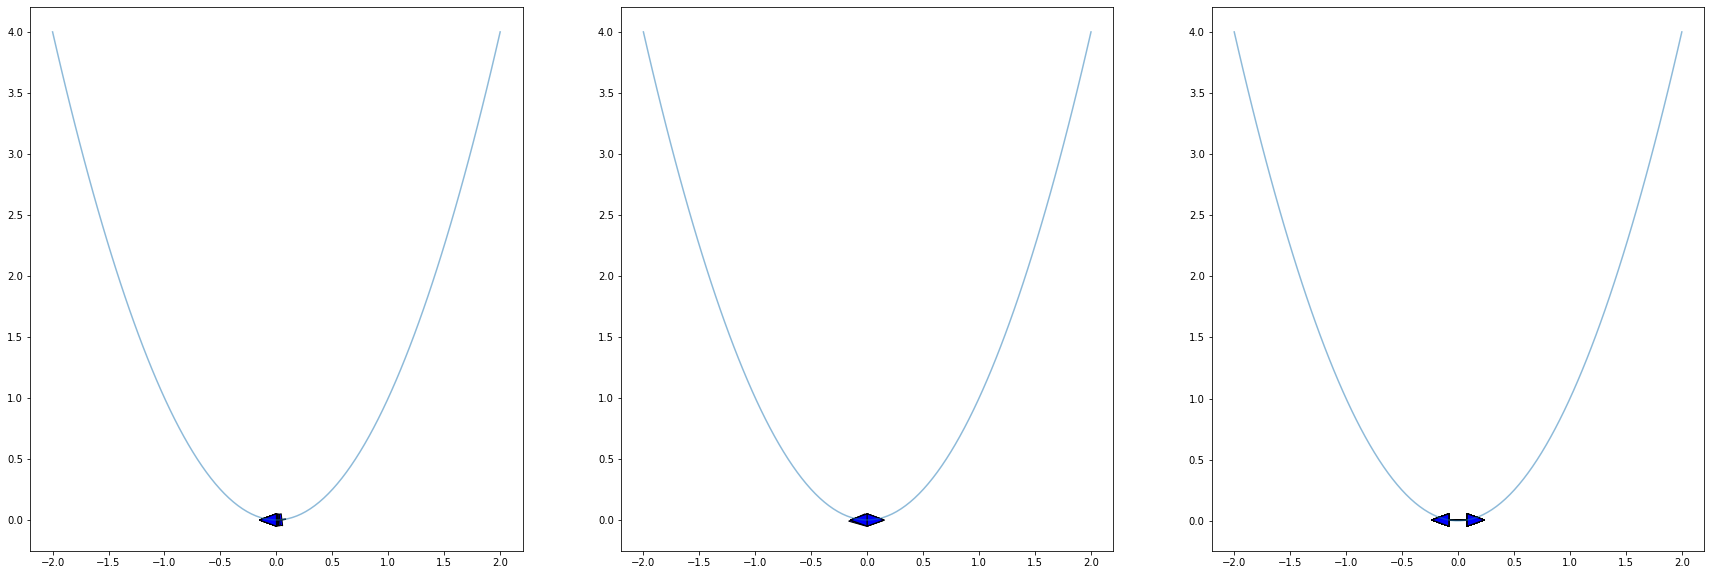

In [3]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))
alpha_list = [0.2, 0.6, 1]
for index, ax in enumerate(ax):
    plot_func(func, ax)
    point, x_hist = gradient_descent(func, alpha = alpha_list[index])
    for a,b in zip(x_hist[:-1], x_hist[1:]):
        ax.arrow(a, func(a), b - a, func(b) - func(a), fc = 'b',
           width = 0.005, head_width = 0.1, head_length = 0.15)

# Exercise 2:

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L2/dataset.csv')
data.head()

,Lương,Thời gian làm việc,Cho vay
0,10,1.0,1
1,5,2.0,1
2,6,1.8,1
3,7,1.0,1
4,8,2.0,1


In [5]:
data = data.to_numpy()

In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def gradient_func(X, t, weight):
    return np.dot(X.T, sigmoid(np.dot(X, weight.T)).reshape((X.shape[0],)) - t)

def LogisticRegression(X, t, lr, epochs):
    X = np.c_[np.ones(X.shape[0]), X]
    weight = np.random.randn(1, X.shape[1])

    count = 0
    while count < epochs:
        new_weight = weight -  lr * gradient_func(X, t, weight)
        if np.all(abs(new_weight - weight) < 1e-8):
            break
        else:
            weight = new_weight
            count += 1
    prob = sigmoid(np.dot(X, new_weight.T)).reshape(X.shape[0],)
    return np.where(prob >= 0.5, 1, 0)

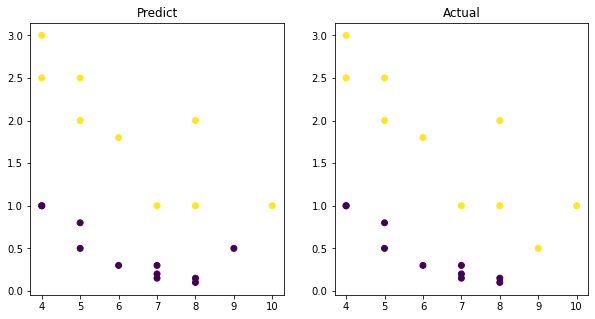

In [7]:
label = LogisticRegression(X = data[:,:-1], t = data[:,-1], lr = 0.002, epochs = 2000)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (10,5))
ax1.scatter(data[:,0], data[:,1], c=label)
ax1.set_title('Predict')
ax2.scatter(data[:,0], data[:,1], c=data[:,-1])
ax2.set_title('Actual')
plt.show()

In [8]:
predict_data = np.array([[2,3],
               [1,8],
               [5,5]])
predict_label = LogisticRegression(X = predict_data[:,:-1], t = predict_data[:,-1], lr = 0.002, epochs = 2000)
predict_label

array([1, 1, 1])

END